## Preprocess Data


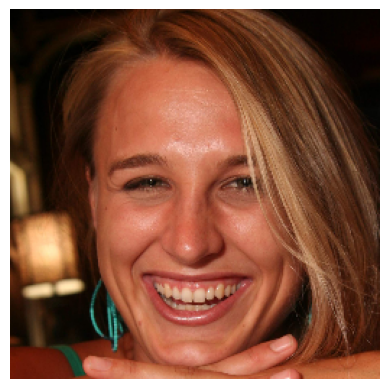

In [8]:
from tensorflow import io as tf_io
from tensorflow import image as tf_image
from tensorflow import expand_dims
from src.visualization.image_plot import image_plot
import keras

input_img = tf_io.read_file("D:\Tesi Dataset\FFHQ\\00000\\00001.png")
input_img = tf_io.decode_png(input_img, channels=3)
input_img = tf_image.convert_image_dtype(input_img, "float32")
input_img = tf_image.resize(input_img, [256,256])
image_plot(input_img)
input_img=expand_dims(input_img, axis=0)

## Model Loading


In [14]:
from tensorflow import keras

# model=keras.models.load_model("checkpoint.model.keras")
model=keras.models.load_model("Model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Conv2D)                  │ (None, 256, 256, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 256, 256, 3)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 32_Conv_1 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 128, 128, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 32_Conv_2 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 128, 128, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 32_Conv_3 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 128, 128, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 64_Conv_1 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 64_Conv_2 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_5             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 64_Conv_3 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 64_Conv_4 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 64_Conv_5 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 64, 64, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 128_Conv_1 (Conv2D)             │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_9             │ (None, 32, 32, 128)    │             0 │
│ (SpatialDropout2D)              │                        │             

 Total params: 38,734,343 (147.76 MB)

 Trainable params: 12,911,447 (49.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,822,896 (98.51 MB)

## Prediction Texture


In [10]:
predicted_texture = model.predict([input_img])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


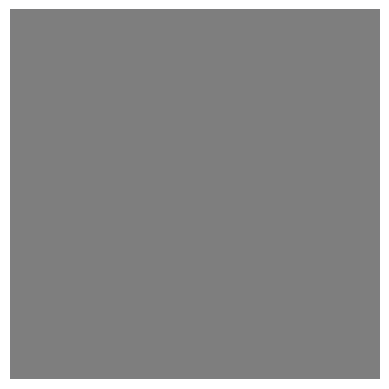

In [11]:
image_plot(predicted_texture)

## Save and upscale


In [12]:
from src.models.upscale import upscale

img=upscale(predicted_texture, save="upscaled_texture.png")

c:\Users\Francesco\miniconda3\envs\texture-env\lib\site-packages\huggingface_hub\file_download.py:669: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


In [13]:
model.save("Model.keras")